In [27]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics


# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Dropout
from tensorflow.random import set_seed

In [28]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])
    
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch 
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()
    
def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')
    
def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

In [29]:
set_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

In [32]:
class_dirs = os.listdir("C:/Users/Kaustubh/Desktop/project/openCV/New folder/Vegetable Images/train/") # list all directories inside "train" folder

image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'C:/Users/Kaustubh/Desktop/project/openCV/New folder/Vegetable Images/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

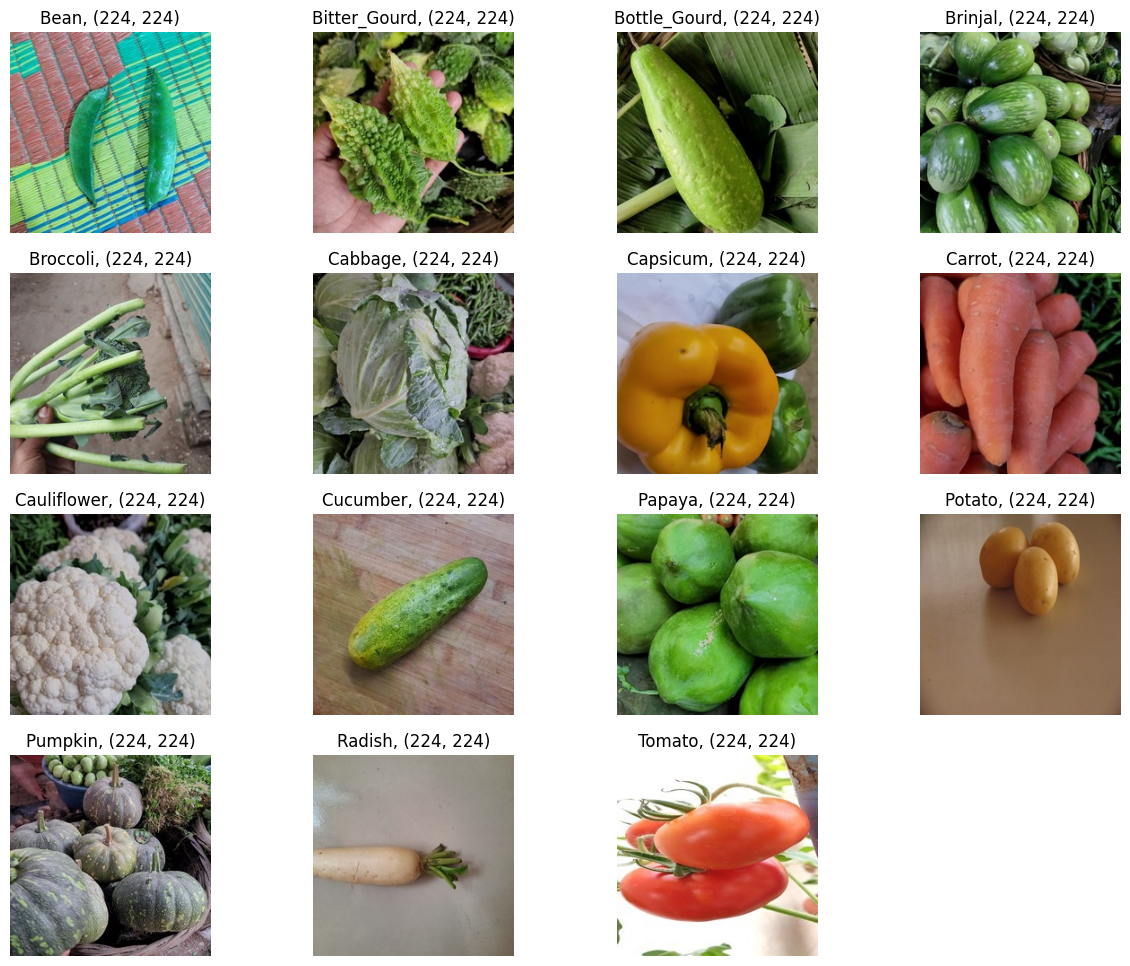

In [33]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()): 
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title 
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")


In [34]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

Count of training samples per class:
            class  count
0           Bean   1000
1   Bitter_Gourd   1000
2   Bottle_Gourd   1000
3        Brinjal   1000
4       Broccoli   1000
5        Cabbage   1000
6       Capsicum   1000
7         Carrot   1000
8    Cauliflower   1000
9       Cucumber   1000
10        Papaya   1000
11        Potato   1000
12       Pumpkin   1000
13        Radish   1000
14        Tomato   1000


<Figure size 1500x1200 with 0 Axes>

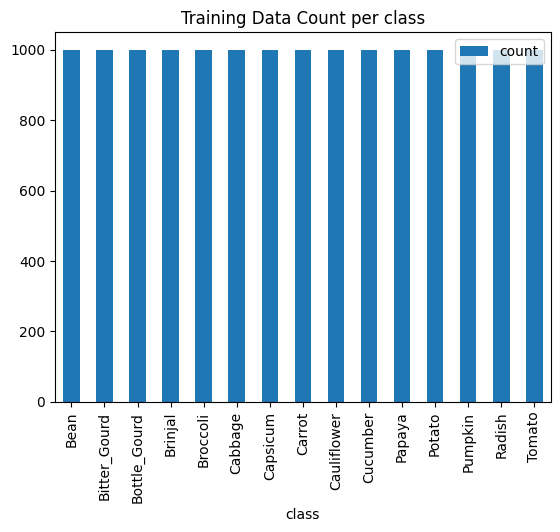

In [35]:
# draw a bar plot using pandas in-built plotting function
plt.figure(figsize=(15,12))
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class") 
plt.show()

In [37]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Kaustubh/Desktop/project/openCV/New folder/Vegetable Images/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Kaustubh/Desktop/project/openCV/New folder/Vegetable Images/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Kaustubh/Desktop/project/openCV/New folder/Vegetable Images/test", shuffle = False,
)


Loading Train Data...
Found 15000 files belonging to 15 classes.

Loading Validation Data...
Found 3000 files belonging to 15 classes.

Loading Test Data...
Found 3000 files belonging to 15 classes.


In [38]:
height, width = 224, 224

# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), # Shape Preprocessing
        layers.Rescaling(1.0/255), # Value Preprocessing
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [39]:
num_classes = 15
hidden_size_1 = 1024
hidden_size_2 = 256

In [40]:
model_ann = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)),
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

In [41]:
model_ann.summary()

Model: "model_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 15)                3855      
                                                                 
Total params: 154,407,951
Trainable params: 154,407,951
Non-trainable params: 0
_________________________________________________________________


In [44]:
tf.keras.utils.plot_model(model_ann, to_file="model_ann.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
epochs = 25
model_fit = model_ann.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
469/469 [==============================] - 994s 2s/step - loss: 12.8630 - accuracy: 0.2846 - val_loss: 2.2423 - val_accuracy: 0.3903
Epoch 2/25
469/469 [==============================] - 1022s 2s/step - loss: 1.8674 - accuracy: 0.4419 - val_loss: 2.2777 - val_accuracy: 0.4193
Epoch 3/25
469/469 [==============================] - 1225s 3s/step - loss: 1.4611 - accuracy: 0.5427 - val_loss: 1.4623 - val_accuracy: 0.5453
Epoch 4/25
469/469 [==============================] - 1195s 3s/step - loss: 1.2462 - accuracy: 0.6023 - val_loss: 1.3936 - val_accuracy: 0.5650
Epoch 5/25
469/469 [==============================] - 1142s 2s/step - loss: 1.1566 - accuracy: 0.6325 - val_loss: 1.1356 - val_accuracy: 0.6363
Epoch 6/25
469/469 [==============================] - 1085s 2s/step - loss: 1.0561 - accuracy: 0.6639 - val_loss: 1.3395 - val_accuracy: 0.5987
Epoch 7/25
469/469 [==============================] - 1077s 2s/step - loss: 1.0553 - accuracy: 0.6667 - val_loss: 1.3395 - val_accuracy:

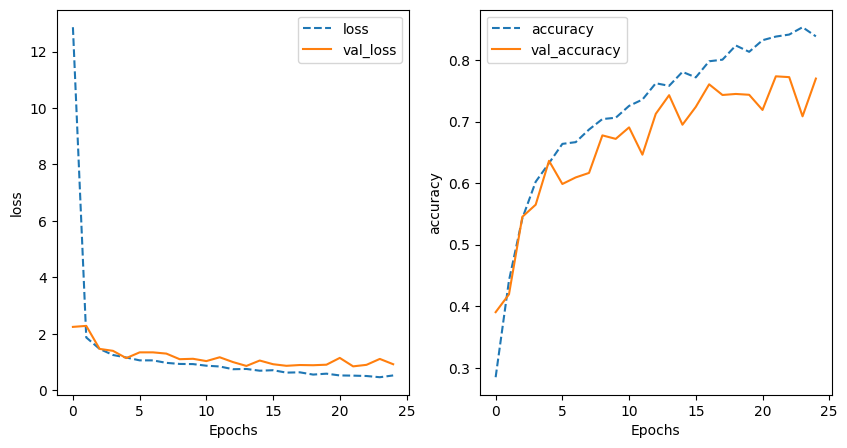

In [47]:
training_plot(['loss', 'accuracy'], model_fit)

In [48]:
testAccuracy(model_ann)

94/94 [==============================] - 20s 187ms/step

Test Accuracy: 77.17%



In [49]:
import tensorflow.keras as keras
model_ann.save("my_model.h5")  # Save the entire model
# or
model_ann.save_weights("my_model_weights.h5")  # Save only the model weights


In [50]:
model_base_cnn = keras.Sequential(
    name="model_base_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=256, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [51]:
model_base_cnn.summary()

Model: "model_base_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               51380480  
                                                                 
 dense_4 (Dense)             (None, 15)                3855      
                                                                 
Total params: 51,384,783
Trainable params: 51,384,783
Non-trainable params: 0
________________________________________

In [52]:
tf.keras.utils.plot_model(model_base_cnn, to_file="model_cnn.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
model_base_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
epochs = 20
model_base_cnn_fit = model_base_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20


469/469 [==============================] - 515s 1s/step - loss: 0.0321 - accuracy: 0.9925 - val_loss: 0.9352 - val_accuracy: 0.8017
Epoch 2/20
469/469 [==============================] - 521s 1s/step - loss: 0.0764 - accuracy: 0.9769 - val_loss: 0.6776 - val_accuracy: 0.8503
Epoch 3/20
469/469 [==============================] - 551s 1s/step - loss: 0.0240 - accuracy: 0.9938 - val_loss: 0.8315 - val_accuracy: 0.8273
Epoch 4/20
469/469 [==============================] - 568s 1s/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 0.6807 - val_accuracy: 0.8520
Epoch 5/20
469/469 [==============================] - 576s 1s/step - loss: 0.0326 - accuracy: 0.9909 - val_loss: 0.7022 - val_accuracy: 0.8610
Epoch 6/20
469/469 [==============================] - 562s 1s/step - loss: 0.0411 - accuracy: 0.9883 - val_loss: 0.7138 - val_accuracy: 0.8710
Epoch 7/20
469/469 [==============================] - 563s 1s/step - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.8730 - val_accuracy: 0.8297
Epoch 8/20

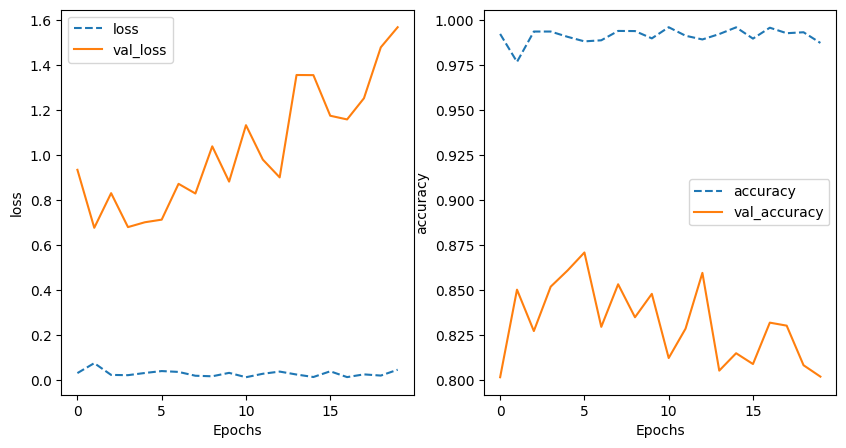

In [57]:
training_plot(['loss', 'accuracy'], model_base_cnn_fit)

In [58]:
testAccuracy(model_base_cnn)

94/94 [==============================] - 27s 280ms/step

Test Accuracy: 80.60%



94/94 [==============================] - 26s 276ms/step


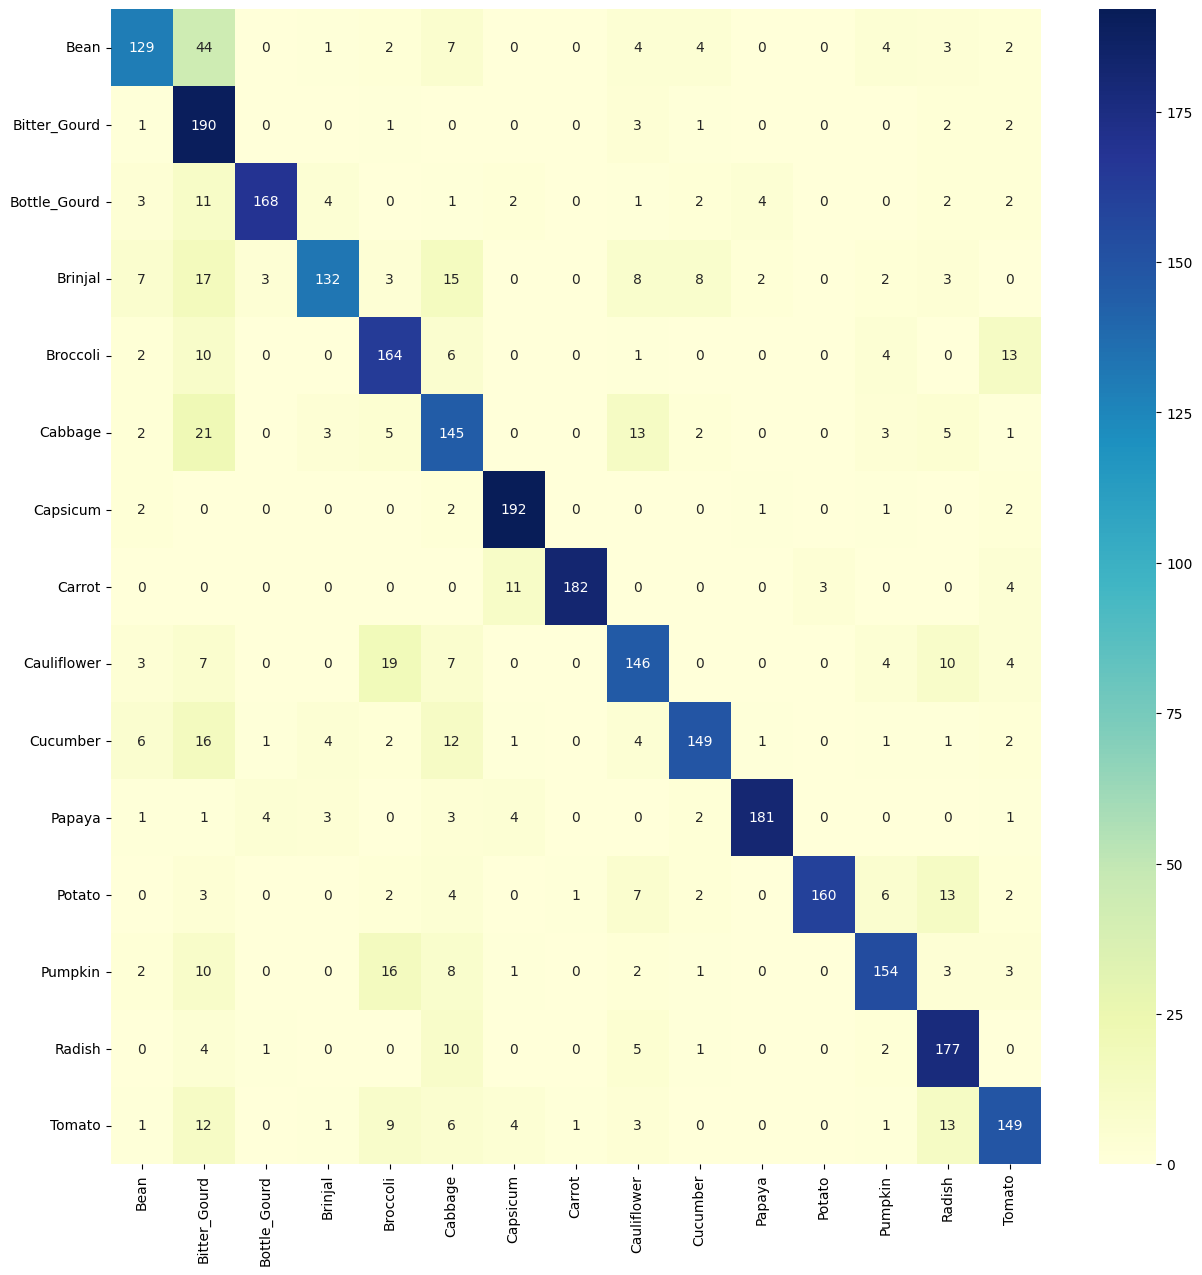

In [59]:
ConfusionMatrix(model_base_cnn, test_ds, test_data.class_names)

In [60]:
model_base_cnn.save("my_cnn_base_model.h5")  # Save the entire model
# or
model_base_cnn.save_weights("my_cnn_base_model_weights.h5")  # Save only the model weights

In [ ]:
model_impv_cnn = keras.Sequential(
    name="model_impv_cnn_2",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [ ]:
model_impv_cnn.summary()

In [ ]:
tf.keras.utils.plot_model(model_impv_cnn, to_file="model_cnn_2.png", show_shapes=True)

In [ ]:
model_impv_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 25
model_fit = model_impv_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)